# Towards reproducible analysis of benthos structural complexity: A case study on Antarctic polychaete reefs using action cameras and remotely operated vehicles
- Aim: Relationships between substrate type and structural complexity
- Goal: Create a complete data pipeline for data analysis and visualization
- Authors: J.C. Montes-Herrera, G. Johnstone, J. Stark, N. Hill, V. Cummings, V. Lucieer
- Contact: juancarlos.montesherrera@utas.edu.au
- Associated publication submitted to journal Remote Sensing in Ecology & Conservation.

In [1]:
import numpy as np
import pandas as pd

In [2]:
structuralcomplexity = pd.read_csv(r"C:\Users\jcmontes\Documents\GitHub\ant_biogenic_structures\data\structural_metrics_clean.csv")
substrate_cover = pd.read_csv(r"C:\Users\jcmontes\Documents\GitHub\ant_biogenic_structures\data\substrate_cover_clean.csv")

In [3]:
print(structuralcomplexity.shape)
print(substrate_cover.shape)

(46, 14)
(46, 11)


## Merge structural metrics and benthic cover data

In [4]:
## We have our two datasets ready to be merged.
habitat_metrics = pd.concat([structuralcomplexity, substrate_cover], axis=1)
habitat_metrics.set_index('file_name', inplace=True)
habitat_metrics.head()

,orig_area,surface16,planerS16,surface32,planerS32,max_h,min_h,fd16,fd32,surface_complexity,...,Broken Polychaete Tubes,Green Encrusting Algae,Crustose Coralline Algae,Encrusting Red Non-Calc,Cobbles,Rock,Polychaete Colonies,Mud,Sedturfrub,Unfocused
file_name,,,,,,,,,,,,,,,,,,,,,
A-1_01,1.0300,2.728238,0.9216,2.728238,0.9216,31.765301,30.216726,2.194972,2.201625,2.960328,...,31.506849,0.0,44.520548,0.0,0.0,0.684932,4.109589,6.164384,0.684932,12.328767
A-2_00,1.0932,2.585702,0.8448,1.759163,0.5120,20.271091,19.179802,2.295925,2.305882,3.060726,...,8.843537,0.0,0.000000,0.0,0.0,0.000000,78.911565,0.000000,0.000000,12.244898
A-2_01,1.0851,3.089361,0.9216,2.146115,0.6144,21.149029,19.961357,2.291301,2.268130,3.352171,...,8.510638,0.0,0.000000,0.0,0.0,0.000000,82.978723,0.000000,0.000000,8.510638
A-2_02,1.0956,2.782415,0.9216,1.842271,0.6144,22.102070,20.879318,2.241619,2.267854,3.019114,...,54.761905,0.0,0.000000,0.0,0.0,0.000000,41.269841,0.000000,0.000000,3.968254
A-2_03,1.0936,1.517664,0.7680,1.249314,0.6144,22.608173,21.743206,2.151390,2.150555,1.976124,...,83.088235,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,16.176471,0.735294


In [5]:
## Add Transect column
transect = []

for i, quadrat in enumerate(habitat_metrics.index):
    t = habitat_metrics.index[i][0] # Take the first character for each row
    transect.append(t);

habitat_metrics.insert(loc=0, column = 'Transect', value = np.array(transect))
habitat_metrics.head()

,Transect,orig_area,surface16,planerS16,surface32,planerS32,max_h,min_h,fd16,fd32,...,Broken Polychaete Tubes,Green Encrusting Algae,Crustose Coralline Algae,Encrusting Red Non-Calc,Cobbles,Rock,Polychaete Colonies,Mud,Sedturfrub,Unfocused
file_name,,,,,,,,,,,,,,,,,,,,,
A-1_01,A,1.0300,2.728238,0.9216,2.728238,0.9216,31.765301,30.216726,2.194972,2.201625,...,31.506849,0.0,44.520548,0.0,0.0,0.684932,4.109589,6.164384,0.684932,12.328767
A-2_00,A,1.0932,2.585702,0.8448,1.759163,0.5120,20.271091,19.179802,2.295925,2.305882,...,8.843537,0.0,0.000000,0.0,0.0,0.000000,78.911565,0.000000,0.000000,12.244898
A-2_01,A,1.0851,3.089361,0.9216,2.146115,0.6144,21.149029,19.961357,2.291301,2.268130,...,8.510638,0.0,0.000000,0.0,0.0,0.000000,82.978723,0.000000,0.000000,8.510638
A-2_02,A,1.0956,2.782415,0.9216,1.842271,0.6144,22.102070,20.879318,2.241619,2.267854,...,54.761905,0.0,0.000000,0.0,0.0,0.000000,41.269841,0.000000,0.000000,3.968254
A-2_03,A,1.0936,1.517664,0.7680,1.249314,0.6144,22.608173,21.743206,2.151390,2.150555,...,83.088235,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,16.176471,0.735294


In [6]:
rov_alt = [1.32, 1.47, 0.94, 1.75, 0.95, 1.52, 1.93, 1.14] #metres
repr_err = [1.36, 1.84, 1.21, 1.32, 1.4, 1.79, 2.47, 1.41] #pixels
scale_err = [1.38, 0.11, 0.14, 1.35, 0.43, 2.52, 3.32, 0.22] # centimetre

In [7]:
habitat_metrics['rov_alt'] = habitat_metrics.groupby('Transect').ngroup().apply(lambda x: rov_alt[x])
habitat_metrics['repr_err'] = habitat_metrics.groupby('Transect').ngroup().apply(lambda x: repr_err[x])
habitat_metrics['scale_err'] = habitat_metrics.groupby('Transect').ngroup().apply(lambda x: scale_err[x])

In [8]:
richness = pd.read_csv(r"C:\Users\jcmontes\Documents\GitHub\ant_biogenic_structures\data\richness.csv", squeeze=True, index_col='Name')
shannon_idx = pd.read_csv(r"C:\Users\jcmontes\Documents\GitHub\ant_biogenic_structures\data\shannon-index.csv", squeeze=True, index_col='Name')

C:\Users\jcmontes\AppData\Local\Temp\ipykernel_22928\1264444593.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  richness = pd.read_csv(r"C:\Users\jcmontes\Documents\GitHub\ant_biogenic_structures\data\richness.csv", squeeze=True, index_col='Name')
C:\Users\jcmontes\AppData\Local\Temp\ipykernel_22928\1264444593.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  shannon_idx = pd.read_csv(r"C:\Users\jcmontes\Documents\GitHub\ant_biogenic_structures\data\shannon-index.csv", squeeze=True, index_col='Name')


In [9]:
habitat_metrics['richness'] = richness
habitat_metrics['shannon-idx'] = shannon_idx

In [10]:
habitat_metrics

,Transect,orig_area,surface16,planerS16,surface32,planerS32,max_h,min_h,fd16,fd32,...,Rock,Polychaete Colonies,Mud,Sedturfrub,Unfocused,rov_alt,repr_err,scale_err,richness,shannon-idx
file_name,,,,,,,,,,,,,,,,,,,,,
A-1_01,A,1.0300,2.728238,0.9216,2.728238,0.9216,31.765301,30.216726,2.194972,2.201625,...,0.684932,4.109589,6.164384,0.684932,12.328767,1.32,1.36,1.38,2,-0.000000
A-2_00,A,1.0932,2.585702,0.8448,1.759163,0.5120,20.271091,19.179802,2.295925,2.305882,...,0.000000,78.911565,0.000000,0.000000,12.244898,1.32,1.36,1.38,3,0.636514
A-2_01,A,1.0851,3.089361,0.9216,2.146115,0.6144,21.149029,19.961357,2.291301,2.268130,...,0.000000,82.978723,0.000000,0.000000,8.510638,1.32,1.36,1.38,4,0.848686
A-2_02,A,1.0956,2.782415,0.9216,1.842271,0.6144,22.102070,20.879318,2.241619,2.267854,...,0.000000,41.269841,0.000000,0.000000,3.968254,1.32,1.36,1.38,6,1.342267
A-2_03,A,1.0936,1.517664,0.7680,1.249314,0.6144,22.608173,21.743206,2.151390,2.150555,...,0.000000,0.000000,0.000000,16.176471,0.735294,1.32,1.36,1.38,4,1.400327
A-2_04,A,1.0802,2.671624,0.7680,2.239882,0.6144,24.321077,22.541927,2.195721,2.189992,...,0.000000,0.000000,0.000000,0.000000,10.144928,1.32,1.36,1.38,3,0.867563
A-2_05,A,1.0896,1.488236,0.8448,1.206174,0.7168,24.948872,24.042574,2.110784,2.110325,...,0.000000,0.000000,0.000000,4.285714,14.285714,1.32,1.36,1.38,3,0.673012
A-3_00,A,1.0719,2.640326,0.7680,2.095036,0.6144,17.281536,16.288658,2.368523,2.333706,...,0.000000,50.344828,0.000000,0.689655,19.310345,1.32,1.36,1.38,3,0.500402
A-3_01,A,1.0812,1.970353,0.7680,1.567784,0.6144,17.690365,16.808386,2.265278,2.244275,...,0.000000,4.511278,0.000000,2.255639,4.511278,1.32,1.36,1.38,5,1.140720


### Export csv

In [11]:
# habitat_metrics.to_csv(r"C:\Users\jcmontes\Documents\GitHub\ant_biogenic_structures\data\for_LMM_merged_metrics.csv")

## Pearson correlation

In [12]:
## P value function
from scipy.stats import pearsonr

def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

In [20]:
## Correlation of the full dataframe that includes structural metrics and benthic cover
habitat_names = habitat_metrics.rename({"Broken Polychaete Tubes":"Broken-P", "Crustose Coralline Algae": "CCA", "Encrusting Red Non-Calc": "E-RedNC",
                       "Polychaete Colonies":"Polych",'Green Encrusting Algae':"E-Green", "surface_complexity":"Surface-C",
                       "mean_profile_curvature":"Profile-C","mean_plan_curvature":"Planar-C","fd32":"D32","fd16":"D16", 
                                        'richness':'richness','shannon-idx':'shannon-idx'}, 
               axis='columns', errors="raise")


In [22]:
habitat_names.columns

Index(['Transect', 'orig_area', 'surface16', 'planerS16', 'surface32',
       'planerS32', 'max_h', 'min_h', 'D16', 'D32', 'Surface-C', 'mean_slope',
       'Profile-C', 'Planar-C', 'Name', 'Broken-P', 'E-Green', 'CCA',
       'E-RedNC', 'Cobbles', 'Rock', 'Polych', 'Mud', 'Sedturfrub',
       'Unfocused', 'rov_alt', 'repr_err', 'scale_err', 'richness',
       'shannon-idx'],
      dtype='object')

In [26]:
habitat_corr = habitat_names.drop(['Unfocused', 'rov_alt', 'repr_err', 'scale_err','Sedturfrub'], axis=1)

df_pearson = habitat_corr.corr(method='pearson')

## Display only structural metrics, useful to see redundancy and select the meaningful ones
structural_corr = df_pearson.iloc[7:21, 7:]

style = structural_corr.style.set_properties(**{'text-align': 'left'}) \
                .background_gradient(cmap='coolwarm') \
                .set_precision(2) \
                .set_table_styles([{'selector': 'th, td', 'props': [('min-width', '45px')]}])

display(style)

C:\Users\jcmontes\AppData\Local\Temp\ipykernel_22928\801545112.py:8: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  style = structural_corr.style.set_properties(**{'text-align': 'left'}) \


,D16,D32,Surface-C,mean_slope,Profile-C,Planar-C,Broken-P,E-Green,CCA,E-RedNC,Cobbles,Rock,Polych,Mud,richness,shannon-idx
D16,1.00,0.99,0.86,0.58,0.41,0.40,0.29,0.06,-0.39,-0.22,-0.24,-0.09,0.60,-0.39,0.09,0.08
D32,0.99,1.00,0.87,0.63,0.46,0.44,0.32,0.05,-0.34,-0.24,-0.30,-0.10,0.63,-0.45,0.09,0.09
Surface-C,0.86,0.87,1.00,0.79,0.48,0.46,0.42,0.01,-0.15,-0.27,-0.29,-0.13,0.58,-0.58,-0.14,-0.12
mean_slope,0.58,0.63,0.79,1.00,0.51,0.50,0.51,0.00,0.24,-0.25,-0.22,-0.06,0.50,-0.85,-0.27,-0.24
Profile-C,0.41,0.46,0.48,0.51,1.00,0.98,0.37,0.02,-0.17,-0.22,-0.21,-0.32,0.63,-0.61,-0.05,-0.02
Planar-C,0.40,0.44,0.46,0.50,0.98,1.00,0.39,0.00,-0.17,-0.20,-0.19,-0.33,0.61,-0.60,-0.07,-0.04
Broken-P,0.29,0.32,0.42,0.51,0.37,0.39,1.00,0.13,-0.14,-0.14,-0.31,-0.26,0.05,-0.68,-0.13,-0.05
E-Green,0.06,0.05,0.01,0.00,0.02,0.00,0.13,1.00,-0.10,-0.06,-0.06,-0.06,-0.07,-0.13,0.36,0.30
CCA,-0.39,-0.34,-0.15,0.24,-0.17,-0.17,-0.14,-0.10,1.00,0.14,-0.06,0.18,-0.36,-0.12,-0.27,-0.33
E-RedNC,-0.22,-0.24,-0.27,-0.25,-0.22,-0.20,-0.14,-0.06,0.14,1.00,0.13,-0.08,-0.22,0.19,-0.09,-0.21


In [27]:
df_p = calculate_pvalues(structural_corr)
df_p

,D16,D32,Surface-C,mean_slope,Profile-C,Planar-C,Broken-P,E-Green,CCA,E-RedNC,Cobbles,Rock,Polych,Mud,richness,shannon-idx
D16,0.0,0.0,0.0,0.0004,0.0021,0.0026,0.0093,0.8743,0.0218,0.0093,0.0129,0.0843,0.0,0.0032,0.4494,0.8898
D32,0.0,0.0,0.0,0.0001,0.0011,0.0014,0.0058,0.8762,0.0334,0.0078,0.0081,0.0718,0.0,0.0015,0.3658,0.7836
Surface-C,0.0,0.0,0.0,0.0,0.0005,0.0006,0.0014,0.9369,0.1196,0.0058,0.0063,0.0657,0.0,0.0001,0.1597,0.4556
mean_slope,0.0004,0.0001,0.0,0.0,0.0004,0.0004,0.0003,0.9621,0.6322,0.0112,0.0131,0.1046,0.0005,0.0,0.0332,0.1393
Profile-C,0.0021,0.0011,0.0005,0.0004,0.0,0.0,0.0019,0.9116,0.1365,0.0198,0.0185,0.0063,0.0,0.0001,0.104,0.3818
Planar-C,0.0026,0.0014,0.0006,0.0004,0.0,0.0,0.0019,0.9452,0.1381,0.0227,0.021,0.0058,0.0,0.0001,0.0973,0.3671
Broken-P,0.0093,0.0058,0.0014,0.0003,0.0019,0.0019,0.0,0.4409,0.3593,0.063,0.0116,0.0247,0.0251,0.0,0.1025,0.3665
E-Green,0.8743,0.8762,0.9369,0.9621,0.9116,0.9452,0.4409,0.0,0.5704,0.6209,0.6407,0.5887,0.8825,0.699,0.1105,0.0847
CCA,0.0218,0.0334,0.1196,0.6322,0.1365,0.1381,0.3593,0.5704,0.0,0.2149,0.4975,0.158,0.036,0.5645,0.2729,0.0707
E-RedNC,0.0093,0.0078,0.0058,0.0112,0.0198,0.0227,0.063,0.6209,0.2149,0.0,0.1214,0.5768,0.0138,0.0209,0.9465,0.4881


## Linear model plots

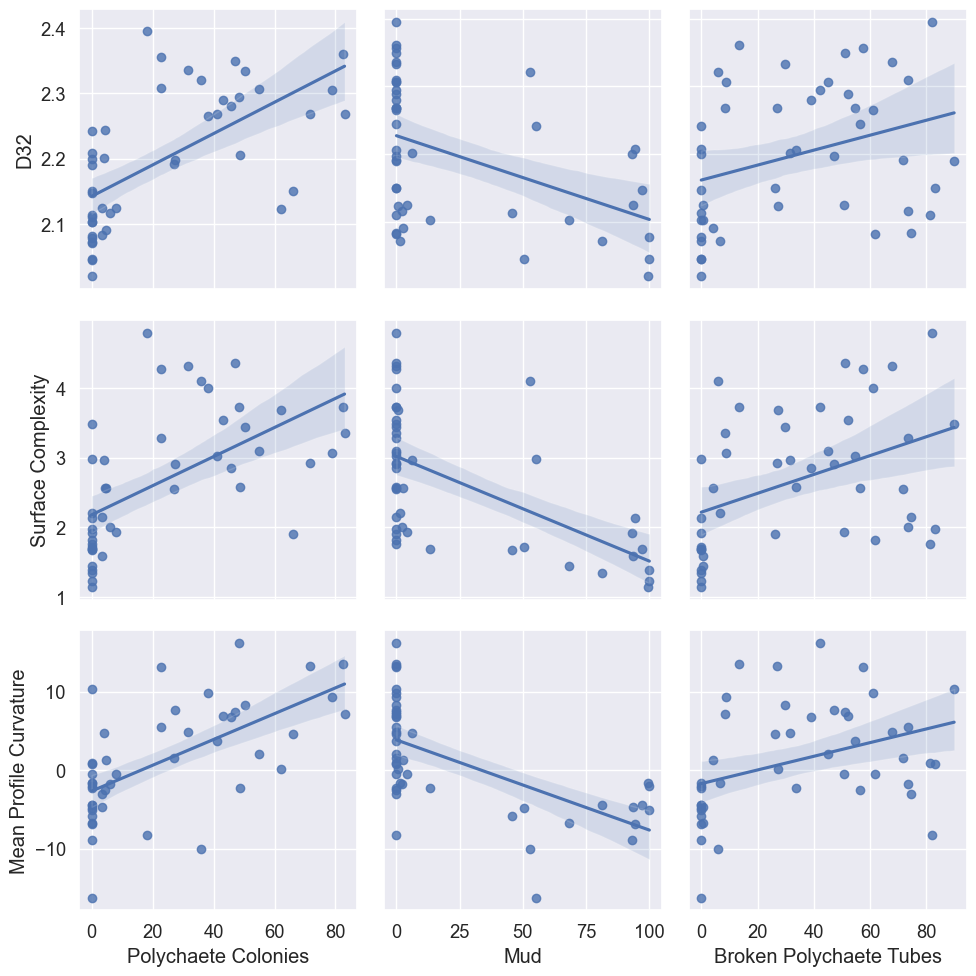

In [16]:
## Regression for main benthic cover with structural complexity metrics
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2)

fig, axes = plt.subplots(3,3, sharex=False, figsize=(10,10))
## Serpulid colonies
sns.regplot(x="Polychaete Colonies", y="fd32", data=habitat_metrics, ax=axes[(0,0)], ci=95, seed = 1).set(xlabel=None, ylabel='D32', xticklabels=[])
sns.regplot(x="Polychaete Colonies", y="surface_complexity", data=habitat_metrics, ax=axes[(1,0)], ci=95, seed = 1).set(xlabel=None,ylabel='Surface Complexity', xticklabels=[])
sns.regplot(x="Polychaete Colonies", y="mean_profile_curvature", data=habitat_metrics, ax=axes[(2,0)], ci=95, seed = 1).set(ylabel='Mean Profile Curvature',)
# sns.regplot(x="Polychaete Colonies", y="Richness", data=habitat_metrics, ax=axes[(3,0)], ci=95, seed = 1).set(ylabel='Richness', yticklabels=[])
## Coralline Algae
#sns.regplot(x="Crustose Coralline Algae", y="fd32", data=habitat_metrics, ax=axes[(0,1)], ci=95, seed = 1).set(xlabel=None, ylabel=None, xticklabels=[], yticklabels=[])
#sns.regplot(x="Crustose Coralline Algae", y="surface_complexity", data=habitat_metrics, ax=axes[(1,1)], ci=95, seed = 1).set(xlabel=None, ylabel=None, xticklabels=[], yticklabels=[])
#sns.regplot(x="Crustose Coralline Algae", y="mean_profile_curvature", data=habitat_metrics, ax=axes[(2,1)], ci=95, seed = 1).set(xlabel='Crustose Coralline Algae (CCA)',ylabel=None,yticklabels=[])
## Soft Substrate / Mud
sns.regplot(x="Mud", y="fd32", data=habitat_metrics, ax=axes[(0,1)], ci=95, seed = 1).set(xlabel=None, ylabel=None, xticklabels=[], yticklabels=[])
sns.regplot(x="Mud", y="surface_complexity", data=habitat_metrics, ax=axes[(1,1)], ci=95, seed = 1).set(xlabel=None, ylabel=None, xticklabels=[], yticklabels=[])
sns.regplot(x="Mud", y="mean_profile_curvature", data=habitat_metrics, ax=axes[(2,1)], ci=95, seed = 1).set(ylabel=None,yticklabels=[])
# sns.regplot(x="Mud", y="Richness", data=habitat_metrics, ax=axes[(3,1)], ci=95, seed = 1).set(ylabel='Richness', yticklabels=[])

## Broken polychaete tubes
sns.regplot(x="Broken Polychaete Tubes", y="fd32", data=habitat_metrics, ax=axes[(0,2)], ci=95, seed = 1).set(xlabel=None, ylabel=None, xticklabels=[], yticklabels=[])
sns.regplot(x="Broken Polychaete Tubes", y="surface_complexity", data=habitat_metrics, ax=axes[(1,2)], ci=95, seed = 1).set(xlabel=None, ylabel=None, xticklabels=[], yticklabels=[])
sns.regplot(x="Broken Polychaete Tubes", y="mean_profile_curvature", data=habitat_metrics, ax=axes[(2,2)], ci=95, seed = 1).set(ylabel=None,yticklabels=[])
# sns.regplot(x="Broken Polychaete Tubes", y="Richness", data=habitat_metrics, ax=axes[(3,2)], ci=95, seed = 1).set(ylabel='Richness', yticklabels=[])

plt.tight_layout()

#fig.savefig(PATH_r + '/' +"linear-model-plot.png")

- Once a complete tabular file with both structural complexity metrics and benthic cover is exported, relationships were tested in R software using linear mixed models.